In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob, os

In [2]:
os.chdir('/Volumes/SML/obstech_10.28.18/')
files_1014_b = []
files_1014_u = []
files_1014_u_lampoff = []
files_1014_u_lamp = []
files_1014_b_lampoff = []
files_1014_b_lamp = []
files_1014_darks = []
for file in glob.glob("*_b*.FIT"):
    files_1014_b.append(file)
for file in glob.glob("*_v*.FIT"):
    files_1014_u.append(file)
for file in glob.glob("darks_flats/*v_n*.FIT"):
    files_1014_u_lampoff.append(file)
for file in glob.glob("darks_flats/*v_0*.FIT"):
    files_1014_u_lamp.append(file)
for file in glob.glob("darks_flats/flat_b*.FIT"):
    files_1014_b_lampoff.append(file)
for file in glob.glob("darks_flats/flat_0*.FIT"):
    files_1014_b_lamp.append(file)
for file in glob.glob("darks_flats/dark*.FIT"):
    files_1014_darks.append(file)

In [3]:
len(files_1014_u_lampoff)

5

In [3]:
#dark frame stuff first
#5 seconds

dark_files = []

for file in files_1014_darks:
    
    dark_frame = fits.open(file)[0]
    dark_files.append(dark_frame.data)


In [4]:
dark_median = np.median(dark_files, axis=0)

In [5]:
#now flat field stuff

#u first

u_lamp = []
u_off = []

for file in files_1014_u_lamp:
    u_lamp.append(fits.open(file)[0].data)

for file in files_1014_u_lampoff:
    u_off.append(fits.open(file)[0].data)



In [6]:
u_lamp_median = np.median(u_lamp, axis=0)
u_off_median = np.median(u_off, axis=0)

In [7]:
diff_u = u_lamp_median - u_off_median
flat_u = diff_u / np.median(diff_u)

In [8]:
#now b

b_lamp = []
b_off = []

for file in files_1014_b_lamp:
    b_lamp.append(fits.open(file)[0].data)

for file in files_1014_b_lampoff:
    b_off.append(fits.open(file)[0].data)

In [9]:
b_lamp_median = np.median(b_lamp, axis=0)
b_off_median = np.median(b_off, axis=0)

In [10]:
diff_b = b_lamp_median - b_off_median
flat_b = diff_b / np.median(diff_b)

In [11]:
#apply flats and darks to raw images
b_raw_images = []
for i in range(300, 315):
    b_raw_images.append(fits.open(files_1014_b[i])[0])

In [12]:
b_dark_applied = []
for image in b_raw_images:
    b_dark_applied.append(image.data - dark_median)

In [13]:
b_final = []
for image in b_dark_applied:
    b_final.append(image.data / flat_b)

In [14]:
for i in range(len(b_final)):
    b_raw_images[i].data = b_final[i]

In [30]:
b_id = 'bxpeg_1028_b'


for i in range(len(b_final)):
    b_raw_images[i].writeto('/Volumes/SML/Reduced_v2/bxpeg_1028/'+b_id+str(i+300)+'.fits')

In [41]:
u_id = 'bxpeg_1028_v'


for i in range(len(u_final)):
    u_raw_images[i].writeto('/Volumes/SML/Reduced_v2/bxpeg_1028/'+u_id+str(i+300)+'.fits')

Text(0.5,1,'Reduced B Band Image')

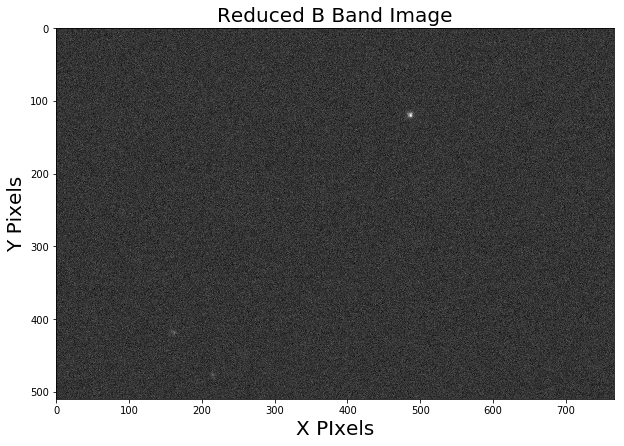

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(b_final[0].data, cmap = 'gray')
plt.ylabel('Y Pixels', fontsize=20)
plt.xlabel('X PIxels', fontsize=20)
plt.title('Reduced B Band Image', fontsize=20)